In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import integrate

## 1. To plot the NACA airfoil using Sources / sinks

In [2]:
N = 100                               # Number of points in each direction
x_start, x_end = -1.0, 1.0            # x-direction boundaries
y_start, y_end = -1.5, 1.5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [3]:
u_inf = 1.0     # free-stream speed

# calculates the free-stream velocity components
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

In [4]:
sigma = 2.5    # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : (X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = u_inf/(2*math.pi)*integrate.quad(integrand, y_min, y_max)[0]
        
        integrand = lambda s: (Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, y_min, y_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

In [5]:
sigma = u_inf*2    # strength of the source-sheet

# boundaries of the source-sheet
x_min, x_max = -1, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : (X[i,j])/((X[i,j])**2+(Y[i,j]-s)**2)
        u_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        
        integrand = lambda s: (Y[i,j]-s)/((X[i,j])**2+(Y[i,j]-s)**2)
        v_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet


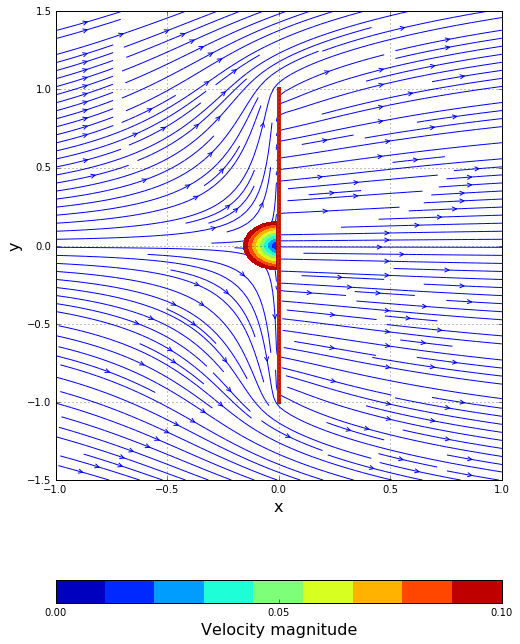

In [6]:
# plots the streamlines
%matplotlib inline

size = 8
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.axvline(0.0, (y_min-y_start)/(y_end-y_start), (y_max-y_start)/(y_end-y_start), 
            color='#CD2305', linewidth=4)
velocity = plt.contourf(X, Y, np.sqrt(u**2+v**2), levels=np.linspace(0.0, 0.1, 10))
cbar = plt.colorbar(velocity, ticks=[0, 0.05, 0.1], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16);

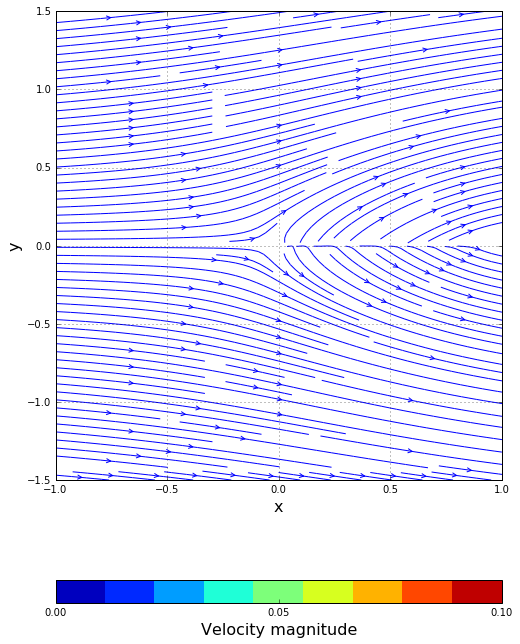

In [7]:
sigma = u_inf*2    # strength of the source-sheet

# boundaries of the source-sheet
x_min, x_max = .0001, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : (X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        
        integrand = lambda s: (Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = sigma/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

# plots the streamlines
%matplotlib inline

size = 8
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

velocity = plt.contourf(X, Y, np.sqrt(u**2+v**2), levels=np.linspace(0.0, 0.1, 10))
cbar = plt.colorbar(velocity, ticks=[0, 0.05, 0.1], orientation='horizontal')
cbar.set_label('Velocity magnitude', fontsize=16);

In [8]:
def get_sigma(x,t):
    
    sigma = 2*u_inf*5*t*((.5*.2969*(x)**-.5)-0.126+(2*-.3516*x)+(3*0.2843*x**2)+(4*-0.1015*x**3))
    
    return sigma

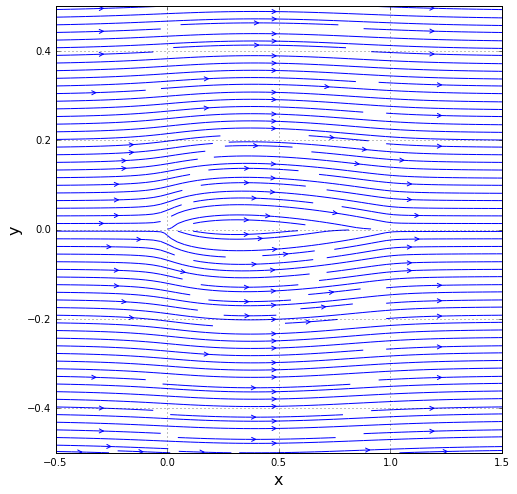

In [9]:
N = 100                               # Number of points in each direction
x_start, x_end = -.50, 1.50            # x-direction boundaries
y_start, y_end = -.5, .5            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

t=.1

# boundaries of the source-sheet
x_min, x_max = 0.0001, 1.0

# computes the velcity field generated by the source-sheet
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : get_sigma(s,t)*(X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        
        integrand = lambda s:  get_sigma(s,t)*(Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

# plots the streamlines
%matplotlib inline

size = 8
plt.figure(figsize=(size, size))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

velocity = plt.contourf(X, Y, np.sqrt(u**2+v**2), levels=np.linspace(0.0, 0.1, 10))


## 2. a. To find out the first five fourier coefficients for NACA 2412 airoil

Equation of thickness of airfoil is given by
        
       ηt = 5*c*t*[0.2969*√(x/c)-0.1260*(x/c)-0.3516(x/c)**2-0.2843*(x/c)**3-0.1015*(x/c)**4] ---> 1
       
To study about the variation of camber and shape of camberline, the camber line shapes are expressed as two parabolic arcs at the maximum camber line ordinate.

the equations of the camber line are 
       ηc = mc/p**2(2p(x/c)-(x/c)**2) when (x/c)<= p         ---------------> 2
       
       ηc = mc/(1-p)**2[(1-2p)+2p(x/c)-(x/c)**2] when (x/c)>=p -------------> 3
       
to determine the camber line slope must be expressed as Fourier series;
differentiating equations 2 and 3 w.r.t x
 
we get, 
       let (x/c) = S
       
       dηc/dx = d(yc/c)/dS = [2m/(p**2)]*(p-S)         S <= p
       
       dηc/dx = d(yc/c)/dS = [2m/((1-p)**2)]*(p-S)     S >= p
       
changing the variables from S to θ

       S = (1-cosθ)/2 
       
gives  
       dηc/dx = m/p**2(2p-1+cosθ),  θ <= θp  --------------> 4
       
       dηc/dx = m/(1-p)**2(2p-1+cosθ),  θ >= θp -----------> 5
       
       substituting the values in the given equation
       
       dηc/dx = ΣBncos(n0)
       
 therefore 
                   
                   
       Ao =  1/ π  ∫ (dηc/dx)dθ = α-Bo  integral range from 0 to pi,
                   
 on solving this by taking the untegration range from 0 to thetap and theta p to π
 
 we get 
       Ao = m/π*p^2 [(2p-1)θp + sinθp]+ m/π*(1-p)^2[(2p-1)(π-θp)-sinθp]
       
for An where n = 1,2,3.....

      An = 1/ π  ∫ (dηc/dx)dθ = Bn
      
      An = 2m/π*p^2 ∫[(2p-1) + cosθ]+                      (integral range from 0 to thata p)
               2m/π*(1-p)^2∫[(2p-1)+cosθ]* cosnθdθ         (integral range from theta p to π)
               
       
 
 

In [10]:
#values of NACA Airfoil
m = 0.02
p = 0.4
theta_p= np.arccos(1-2*p) 

#on solving and plugging these values 

Bo = integrate.quad(lambda theta: (m/(math.pi*p**2))*(2*p-1+np.cos(theta)), 0.0, theta_p)[0]\
      +integrate.quad(lambda theta: (m/(math.pi*(1-p)**2))*(2*p-1+np.cos(theta)), theta_p, math.pi)[0]
    
B1 = integrate.quad(lambda theta: (2*m/(math.pi*p**2))*np.cos(theta)*(2*p-1+np.cos(theta)), 0.0, theta_p)[0]\
      +integrate.quad(lambda theta: (2*m/(math.pi*(1-p)**2))*np.cos(theta)*(2*p-1+np.cos(theta)), theta_p, math.pi)[0]
    
B2 = integrate.quad(lambda theta: (2*m/(math.pi*p**2))*np.cos(theta)**2*(2*p-1+np.cos(theta)), 0.0, theta_p)[0]\
       +integrate.quad(lambda theta: (2*m/(math.pi*(1-p)**2))*np.cos(theta)**2*(2*p-1+np.cos(theta)), theta_p, math.pi)[0]
    
B3 = integrate.quad(lambda theta: (2*m/(math.pi*p**2))*np.cos(theta)**3*(2*p-1+np.cos(theta)), 0.0, theta_p)[0]\
      +integrate.quad(lambda theta: (2*m/(math.pi*(1-p)**2))*np.cos(theta)**3*(2*p-1+np.cos(theta)), theta_p, math.pi)[0]
    
B4 = integrate.quad(lambda theta: (2*m/(math.pi*p**2))*np.cos(theta)**4*(2*p-1+np.cos(theta)), 0.0, theta_p)[0]\
      +integrate.quad(lambda theta: (2*m/(math.pi*(1-p)**2))*np.cos(theta)**4*(2*p-1+np.cos(theta)), theta_p, math.pi)[0]

print('Bo =',round(Bo,3))
print('B1 =',round(B1,3))
print('B2 =',round(B2,3))
print('B3 =',round(B3,3))
print('B4 =',round(B4,3))

Bo = 0.004
B1 = 0.081
B2 = 0.011
B3 = 0.062
B4 = 0.01


# 2.b To plot the flow around the thin arcs with α = 0 and α =5

In [11]:
# Given Values

U_inf = 1
alpha = 0*math.pi/180


# Grid
N = 20                                      
x_start, x_stop = -1.0, 2.0              
y_start, y_stop = -1.0, 1.0                  
x = np.linspace(x_start, x_stop, N)         
y = np.linspace(y_start, y_stop, N)         

X, Y = np.meshgrid(x,y) 

In [12]:
# defining gamma

def get_gamma(theta):
    
    Gamma = 2*U_inf*((alpha-Bo)*(1+np.cos(theta)/np.sin(theta))+B1+B2+B3+B4)
    
    return Gamma



In [13]:
# Free Stream 
u_freestream = U_inf*np.cos(alpha)*np.ones((N, N), dtype=float)
v_freestream = U_inf*np.sin(alpha)*np.ones((N, N), dtype=float)

# Boundaries
x_min, x_max = 0., 1.0

# Velocity Field 
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : get_gamma(np.arccos(1-2*s))*(Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        
        integrand = lambda s:  get_gamma(np.arccos(1-2*s))*(X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = -1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]

# Superposition
u = u_freestream + u_sheet
v = v_freestream + v_sheet

In [14]:
# To create Airfoil Shape

xt_1 = np.linspace(0, .4, 200)
xt_2 = np.linspace(.4, 1, 200)

yt_1 = (2*m*xt_1/(p**2))*(2*p-xt_1)
yt_2 = (2*m*(1-xt_2)/((1-p)**2))*(1+xt_2-2*p)

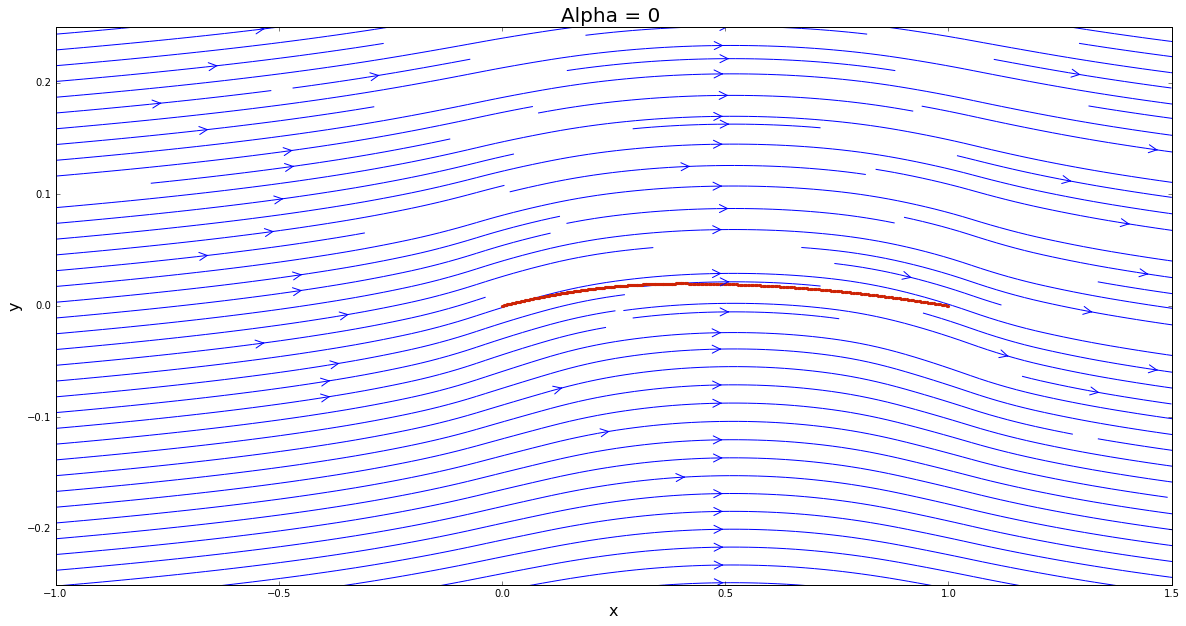

In [15]:
# To plot the streamlines
%matplotlib inline

plt.figure(figsize=(20,10))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(-1,1.5)
plt.ylim(-.25,.25)
plt.title('Alpha = 0 ', fontsize=20)
plt.streamplot(X, Y, u, v, density=5, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(xt_1, yt_1/2, s=10, color='#CD2305', marker='o', linewidth=0)
plt.scatter(xt_2, yt_2/2, s=10, color='#CD2305', marker='o', linewidth=0)



## α =5

In [16]:
# Given Values

U_inf = 1
alpha = 5*math.pi/180


# Grid
N = 20                                      
x_start, x_stop = -1.0, 2.0              
y_start, y_stop = -1.0, 1.0                  
x = np.linspace(x_start, x_stop, N)         
y = np.linspace(y_start, y_stop, N)         

X, Y = np.meshgrid(x,y)

In [17]:
# defining gamma
def get_gamma_1(theta):
    
    Gamma = 2*U_inf*((alpha-Bo)*(1+np.cos(theta)/np.sin(theta))+B1+B2+B3+B4)
    
    return Gamma



In [18]:
# Free Stream 
u_freestream = U_inf*np.cos(alpha)*np.ones((N, N), dtype=float)
v_freestream = U_inf*np.sin(alpha)*np.ones((N, N), dtype=float)

# Bounds
x_min, x_max = 0., 1.0

# Velocity Field 1
u_sheet = np.empty((N, N), dtype=float)
v_sheet = np.empty((N, N), dtype=float)
for i in range(N):
    for j in range(N):  
        integrand = lambda s : get_gamma_1(np.arccos(1-2*s))*(Y[i,j])/((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = 1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]
        
        integrand = lambda s:  get_gamma_1(np.arccos(1-2*s))*(X[i,j]-s)/((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = -1/(2*math.pi)*integrate.quad(integrand, x_min, x_max)[0]

# Superposition
u2 = u_freestream + u_sheet
v2 = v_freestream + v_sheet

In [19]:
# Creates Airfoil Shape

xt_1 = np.linspace(0, .4, 200)
xt_2 = np.linspace(.4, 1, 200)

yt_1 = (2*m*xt_1/(p**2))*(2*p-xt_1)
yt_2 = (2*m*(1-xt_2)/((1-p)**2))*(1+xt_2-2*p)

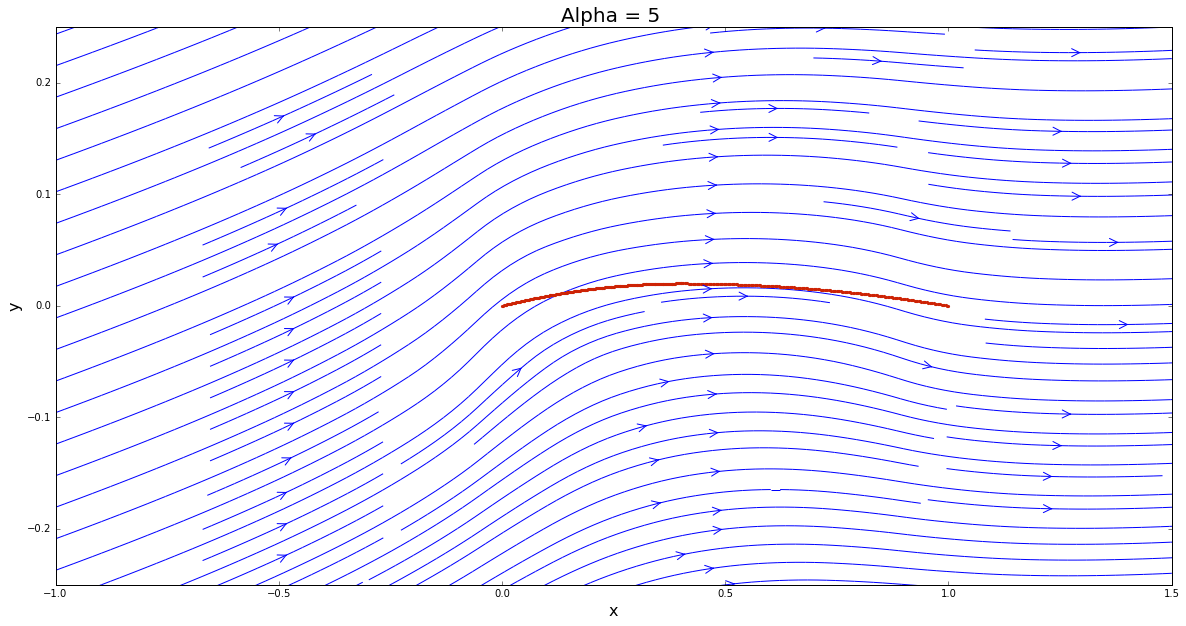

In [20]:
plt.figure(figsize=(20,10))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(-1,1.5)
plt.ylim(-.25,.25)
plt.title('Alpha = 5 ', fontsize=20)
plt.streamplot(X, Y, u2, v2, density=5, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(xt_1, yt_1/2, s=10, color='#CD2305', marker='o', linewidth=0)
plt.scatter(xt_2, yt_2/2, s=10, color='#CD2305', marker='o', linewidth=0)


## 2.c. The total lift generated by this arc by the Kutta-Joukowski theorem

In [21]:
print (Bo)
print (B1)

0.004492886379393442
0.0814951416008563


Total Aerodynamic lift
                     L = ρ*U_inf*∫Γ(x)dx  integral ranging from 0 to 1
                     
          Γ = ∫γ(x)dx = ∫ γ(θ)c/2sinθdθ integer range from 0 to π
          
            = 2u_infi ∫ [Ao (1+cosθ/sinθ)+Σ Ansin(nθ)]c/2sin0d0
            
         but, ∫(1+cosθ)dθ = π  range from 0 to π
         
         sin(nθ)sinθ != 0 (if n= 1)
         
therefore 
             
             Γ = U_infi*c*π*(Ao+(A1)/2)
             
             L = ρ * (U_infi)*Γ
             

In [22]:
rho = 1.225
U_inf = 1
c = 1
alpha = 0*math.pi/180
alpha2 = 5*math.pi/180


lo = integrate.quad(lambda x: 2*rho*U_inf**2*(((alpha-Bo)*(1+np.cos(np.arccos(1-2*x)))/np.sin(np.arccos(1-2*x)))\
    +B1*np.sin(np.arccos(1-2*x))+B2*np.sin(2*np.arccos(1-2*x))+B3*np.sin(3*np.arccos(1-2*x))+B4*np.sin\
                                            (4*np.arccos(1-2*x))),0,1)[0]

l5 = integrate.quad(lambda x: 2*rho*U_inf**2*(((alpha2-Bo)*(1+np.cos(np.arccos(1-2*x)))/np.sin(np.arccos(1-2*x)))\
     +B1*np.sin(np.arccos(1-2*x))+B2*np.sin(2*np.arccos(1-2*x))+B3*np.sin(3*np.arccos(1-2*x))\
                                              +B4*np.sin(4*np.arccos(1-2*x))),0,1)[0]


print ("Lo = ", (lo))
print ("L5 = ", (l5))

Lo =  0.139524376538164
L5 =  0.4753650818529551


## 2.C Theoritical angle of attack

Theoritical angle of attack is given by 

                    α = Bo- (B1/2)
                    


In [23]:
Alpha = Bo - (B1/2)
print (alpha)

0.0


therefore this equation is applied at zero angle of attack